# Poisson underdispersion

In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
import matplotlib

In [2]:
def poissonsamplevar(mu, n, perc=5, nrep=100, seed=42):
    np.random.seed(seed)
    
    v = np.zeros(nrep)
    for i in range(nrep):
        x = np.random.poisson(mu, size=n)
        v[i] = np.var(x)
    return np.percentile(v, perc)

In [20]:
for country in countries:
    print(country, df[df['location']==country]['date'].values[-1])

Afghanistan 2021-07-31
Africa 2021-07-31
Albania 2021-07-31
Algeria 2021-07-31
Andorra 2021-07-31
Angola 2021-07-31
Anguilla 2021-07-23
Antigua and Barbuda 2021-07-31
Argentina 2021-07-31
Armenia 2021-07-31
Aruba 2021-07-31
Asia 2021-07-31
Australia 2021-07-31
Austria 2021-07-31
Azerbaijan 2021-07-31
Bahamas 2021-07-31
Bahrain 2021-07-31
Bangladesh 2021-07-31
Barbados 2021-07-31
Belarus 2021-07-31
Belgium 2021-07-31
Belize 2021-07-31
Benin 2021-07-31
Bermuda 2021-07-30
Bhutan 2021-07-31
Bolivia 2021-07-31
Bonaire Sint Eustatius and Saba 2021-04-09
Bosnia and Herzegovina 2021-07-31
Botswana 2021-07-31
Brazil 2021-07-31
British Virgin Islands 2021-07-23
Brunei 2021-07-31
Bulgaria 2021-07-31
Burkina Faso 2021-07-31
Burundi 2021-07-31
Cambodia 2021-07-31
Cameroon 2021-07-31
Canada 2021-07-31
Cape Verde 2021-07-31
Cayman Islands 2021-07-30
Central African Republic 2021-07-31
Chad 2021-07-31
Chile 2021-07-31
China 2021-07-31
Colombia 2021-07-31
Comoros 2021-07-31
Congo 2021-07-31
Cook Island

<IPython.core.display.Javascript object>


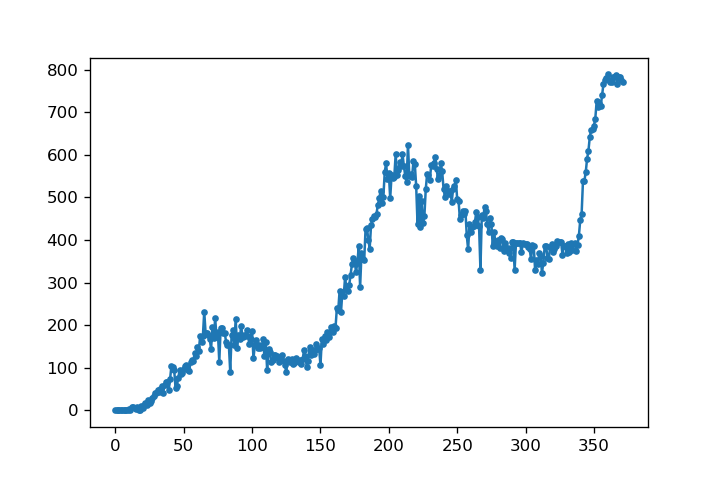

................................................*.......................**


In [17]:
country='Russia'
t = df[df['location']==country]['new_deaths'].values
t = t[~np.isnan(t)]
t = t[t>=0]
t[-6:-450:-7] = np.nan
t[-7:-450:-7] = np.nan
t = t[~np.isnan(t)]
plt.figure(figsize=(6,4))
plt.plot(t,'.-')

win = 5

if t.size > win*10:
    l = np.floor(t.size/win).astype(int)
    d = np.zeros(l)
    for i in range(l):
        tt = t[i*win:(i+1)*win]
        if np.var(tt) < poissonsamplevar(np.mean(tt), win, nrep=nrep):
            d[i] = 1
    for i in range(l):
        if d[i]==1:
            print('*', end='')
        else:
            print('.', end='')
    print('')

In [11]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv?raw=true')
countries = np.unique(df['location'])

win = 10
cutoff = 3
nrep = 1000

print('== DEATHS ==')
for country in countries:
    t = df[df['location']==country]['new_deaths'].values
    t = t[~np.isnan(t)]
    t = t[t>=0]
    t = t[-450:]
    
    t[-6:-450:-7] = np.nan
    t[-7:-450:-7] = np.nan
    t = t[~np.isnan(t)]
    
    if t.size > win*10:
        l = np.floor(t.size/win).astype(int)
        d = np.zeros(l)
        for i in range(l):
            tt = t[i*win:(i+1)*win]
            if np.var(tt) < poissonsamplevar(np.mean(tt), win, nrep=nrep):
                d[i] = 1
        if np.sum(d) > cutoff:
            print(f'{country[:20]:20}', end='')
            for i in range(l):
                if d[i]==1:
                    print('*', end='')
                else:
                    print('.', end='')
            print('')

print('')
print('== CASES ==')
for country in countries:
    t = df[df['location']==country]['new_cases'].values
    t = t[~np.isnan(t)]
    t = t[t>=0]
    t = t[-450:]
    
    t[-6:-450:-7] = np.nan
    t[-7:-450:-7] = np.nan
    t = t[~np.isnan(t)]
    
    if t.size > win*10:
        l = np.floor(t.size/win).astype(int)
        d = np.zeros(l)
        for i in range(l):
            tt = t[i*win:(i+1)*win]
            if np.var(tt) < poissonsamplevar(np.mean(tt), win, nrep=nrep):
                d[i] = 1
        if np.sum(d) > cutoff:
            print(f'{country[:20]:20}', end='')
            for i in range(l):
                if d[i]==1:
                    print('*', end='')
                else:
                    print('.', end='')
            print('')

== DEATHS ==
Albania             .....*.....*.........**.........
Algeria             ***.*.**..........*.*..*.**.**..
Azerbaijan          ...**...***....*....*...*.*.....
Belarus             *******.*.*...******************
Cuba                ..................*.***.........
Egypt               ...*....**.***.*.***.**.*.*.....
El Salvador         .......*.*.***....*.*...*.**.***
Kyrgyzstan          ...........................**.**
Moldova             ..............*...*....**..**..*
Saudi Arabia        *.......***.*****.**********.**.
Serbia              ..*.....**......*.***...*.......
Syria               ........*******...****.*..**.*..
Turkey              ..*.****....*...*....*..........
United Arab Emirates..**....................*.**....
Uzbekistan          ......*.....*...............*.*.
Venezuela           ....**.*.**.*****.***.****.*....

== CASES ==
Tajikistan          .....*.********.................


In [3]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv?raw=true')
countries = np.unique(df['location'])

win = 10
cutoff = 3
nrep = 1000

print('== DEATHS ==')
for country in countries:
    t = df[df['location']==country]['new_deaths'].values
    t = t[~np.isnan(t)]
    t = t[t>=0]
    t = t[-450:]
    
    if t.size > win*10:
        l = np.floor(t.size/win).astype(int)
        d = np.zeros(l)
        for i in range(l):
            tt = t[i*win:(i+1)*win]
            if np.var(tt) < poissonsamplevar(np.mean(tt), win, nrep=nrep):
                d[i] = 1
        if np.sum(d) > cutoff:
            print(f'{country[:20]:20}', end='')
            for i in range(l):
                if d[i]==1:
                    print('*', end='')
                else:
                    print('.', end='')
            print('')

print('')
print('== CASES ==')
for country in countries:
    t = df[df['location']==country]['new_cases'].values
    t = t[~np.isnan(t)]
    t = t[t>=0]
    t = t[-450:]
    
    if t.size > win*10:
        l = np.floor(t.size/win).astype(int)
        d = np.zeros(l)
        for i in range(l):
            tt = t[i*win:(i+1)*win]
            if np.var(tt) < poissonsamplevar(np.mean(tt), win, nrep=nrep):
                d[i] = 1
        if np.sum(d) > cutoff:
            print(f'{country[:20]:20}', end='')
            for i in range(l):
                if d[i]==1:
                    print('*', end='')
                else:
                    print('.', end='')
            print('')

== DEATHS ==
Albania             .....*.....*...**....*...*...*...............
Algeria             ****.*...*.**...........**..**..**.*****.**..
Azerbaijan          ...****....*.**......**....**....**.**.......
Belarus             *********.***....*.**************************
Cuba                ..........................*.**.*............*
Egypt               ....*........*..****.*..****.***.**.**.......
El Salvador         ........*.*....*****..*..*.***....*..**.****.
Iraq                ...........*.....*...............*.......*...
Kuwait              ......*...*...*...*.*.......*.......*........
Kyrgyzstan          .....................................***..***
Lebanon             ...................................**.*..***.
Moldova             ...................**.*....*.*..*.*...*....*.
Paraguay            ....................*.*.*..**..............*.
Saudi Arabia        *..**....*.*.***********.**************.****.
Serbia              ..***.*.*.*.**.*......*..*****.*.**...**...

Every dot corresponds to 10 consecutive days. Asterisks show when the variance is lower than the Poisson variance ($p<0.05$) with the observed average, i.e. show statistically significant underdispersion. All countries in the Johns Hopkins dataset were tested, but only countries with more than 3 asterisks are shown here. Daily numbers of COVID-19 deaths and cases were both analyzed.

NOTE: Four non-consecutive asterisks may not be suspicious enough.

## Russian regions

In [9]:
# https://docs.google.com/spreadsheets/d/1nCxvNcuZGNswsf97mliLikmUIsOrOGZtL-VI7xfN-Zw

win = 10
cutoff = 3
nrep = 1000

df = pd.read_csv('https://docs.google.com/spreadsheets/d/1nCxvNcuZGNswsf97mliLikmUIsOrOGZtL-VI7xfN-Zw/export?format=csv&gid=375550280')
df = df.values

print('== DEATHS ==')
for row in range(df.shape[0]):
    t = df[row,1:]
    t = np.diff(t[::-1])
    t[t<0] = 0
    
    if t.size > win*10:
        l = np.floor(t.size/win).astype(int)
        d = np.zeros(l)
        for i in range(l):
            tt = t[i*win:(i+1)*win]
            if np.var(tt) < poissonsamplevar(np.mean(tt), win, nrep=nrep):
                d[i] = 1
        if np.sum(d) > cutoff:
            print(f'{df[row,0][:20]:20}', end='')
            for i in range(l):
                if d[i]==1:
                    print('*', end='')
                else:
                    print('.', end='')
            print('')
            
print('')

df = pd.read_csv('https://docs.google.com/spreadsheets/d/1nCxvNcuZGNswsf97mliLikmUIsOrOGZtL-VI7xfN-Zw/export?format=csv&gid=1771324359')
df = df.values

print('== CASES ==')
for row in range(df.shape[0]):
    t = df[row,1:]
    t = np.diff(t[::-1])
    t[t<0] = 0
    
    if t.size > win*10:
        l = np.floor(t.size/win).astype(int)
        d = np.zeros(l)
        for i in range(l):
            tt = t[i*win:(i+1)*win]
            if np.var(tt) < poissonsamplevar(np.mean(tt), win, nrep=nrep):
                d[i] = 1
        if np.sum(d) > cutoff:
            print(f'{df[row,0][:20]:20}', end='')
            for i in range(l):
                if d[i]==1:
                    print('*', end='')
                else:
                    print('.', end='')
            print('')

== DEATHS ==
Алтайский край      .......................*..*.*.*.**........**...
Астраханская область..............**...*...******..****************
Белгородская область...........................*..*...********.*.**
Владимирская область........*.**.*................***.**...........
Волгоградская област................*......******************..****
Вологодская область ........................*.......**************.
Забайкальский край  .....................**.........****..***.**...
Ивановская область  ................................*..*......***.*
Иркутская область   .....................*....*.*.***************..
Кабардино-Балкарская.................*.....**.....**...***.........
Карачаево-Черкесская.........................................***..*
Кемеровская область .......................****..*.**.....*.......*
Кировская область   ..............*..**.*******.*.***.*.*.**..**.**
Краснодарский край  .......*....**.....***.**********************.*
Красноярский край   .............*.

Ставропольский край ......**......******************............*..
Тамбовская область  .....***.***.****.*...****************.*.*..**.
Тверская область    ...........******......*********************...
Томская область     .........*..***.....*..*****.*.*....*.*****....
Тульская область    ......*.***.*******...**..****.*.*****.*****..*
Тюменская область   ..........*.*.***....***********.***.*******...
Удмуртская Республик........**...**....******.**.*..*************..
Ульяновская область .........****..****.*****.**.*.*..***********..
Хабаровский край    ......**......*..*....*..***.**...**.*..**.....
Ханты-Мансийский АО ..........*....**...********......*****.***....
Челябинская область ..........**..**.*..*..*.********..**********..
Чеченская Республика....**.*......********....*......***********...
Ямало-Ненецкий автон.............*..*..*.*******.*.*..**********...
Ярославская область ........***********....**********.**********...
